In [3]:
import glob
import struct
import pandas as pd
import os
# Assuming the file pattern is correct and should match all relevant files
files = glob.glob("data/data_exp_185_*.bin")
# Sort files by name
files.sort()

# Define column names and dtypes
columns_expe = ["microstime", 
                "acc9x", "acc9y", "acc9z", 
                "gyr9x", "gyr9y", "gyr9z", 
                "acc37x", "acc37y", "acc37z", 
                "gyr37x", "gyr37y", "gyr37z", 
                "quat9x", "quat9y", "quat9z", "quat9w", 
                "vit9x", "vit9y", "vit9z", 
                "pos9x", "pos9y", "pos9z"]

dtypes_expe = ['uint32',  # microstime
               'float32', 'float32', 'float32', 
               'float32', 'float32', 'float32', 
               'float32', 'float32', 'float32', 
               'float32', 'float32', 'float32', 
               'float32', 'float32', 'float32', 'float32', 
               'float32', 'float32', 'float32', 
               'float32', 'float32', 'float32']

# Create the format string for struct.unpack
fmt = '<' + 'I'  # uint32_t for microstime
fmt += 'f' * (len(columns_expe) - 1)  # float32 for all other columns

# Calculate the size of one row in bytes
size = struct.calcsize(fmt)

# Define chunk size in terms of number of rows
chunk_size = 100000  # Adjust chunk size as needed based on available memory

def process_file_chunk(file, start, end):
    with open(file, mode="rb") as f:
        f.seek(start)
        chunk_bytes = f.read(end - start)
        
    df_rows = []
    for i in range(0, len(chunk_bytes), size):
        row_bytes = chunk_bytes[i:i + size]
        try:
            row = struct.unpack(fmt, row_bytes)
        except struct.error:
            row = [None] * len(columns_expe)  # Handle any unpacking error by filling the row with None
        df_rows.append(row)
    
    return df_rows

# Create a generator to process files in chunks
def process_files_in_chunks(files):
    for file in files:
        file_size = os.path.getsize(file)
        for start in range(0, file_size, chunk_size * size):
            end = min(start + chunk_size * size, file_size)
            yield process_file_chunk(file, start, end)

# Initialize an empty DataFrame
df = pd.DataFrame(columns=columns_expe)

# Process each chunk and append to DataFrame
for chunk in process_files_in_chunks(files):
    df_chunk = pd.DataFrame(chunk, columns=columns_expe)
    # keep only a hundredth of the data
    # df_chunk = df_chunk.iloc[::100]
    df = pd.concat([df, df_chunk], ignore_index=True)

print(df)


        microstime     acc9x     acc9y     acc9z     gyr9x     gyr9y  \
0         27672525 -9.794775 -0.359046  0.186704  0.002399  0.000867   
1         27672564 -9.794775 -0.368621  0.196278  0.002399  0.000867   
2         27672603 -9.794775 -0.368621  0.196278  0.002399  0.000867   
3         27672642 -9.785200 -0.373408  0.201066  0.001334  0.000867   
4         27672681 -9.785200 -0.373408  0.215428  0.000801  0.000867   
...            ...       ...       ...       ...       ...       ...   
1332987   79659018 -9.766051 -0.397344  0.248939 -0.000877 -0.001470   
1332988   79659057 -9.766051 -0.397344  0.248939 -0.000877 -0.001470   
1332989   79659096 -9.766051 -0.402132  0.244151 -0.001410 -0.001470   
1332990   79659135 -9.766051 -0.402132  0.244151 -0.001942 -0.000938   
1332991   79659174 -9.766051 -0.402132  0.244151 -0.001942 -0.000938   

            gyr9z    acc37x    acc37y    acc37z  ...    quat9x    quat9y  \
0        0.001233 -0.023936  9.852222  0.253726  ... -0.361

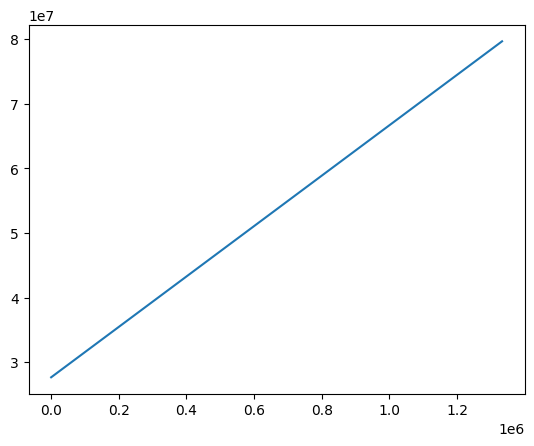

In [4]:
# plot microstime
import matplotlib.pyplot as plt
plt.figure()
plt.plot(df["microstime"])
plt.show()

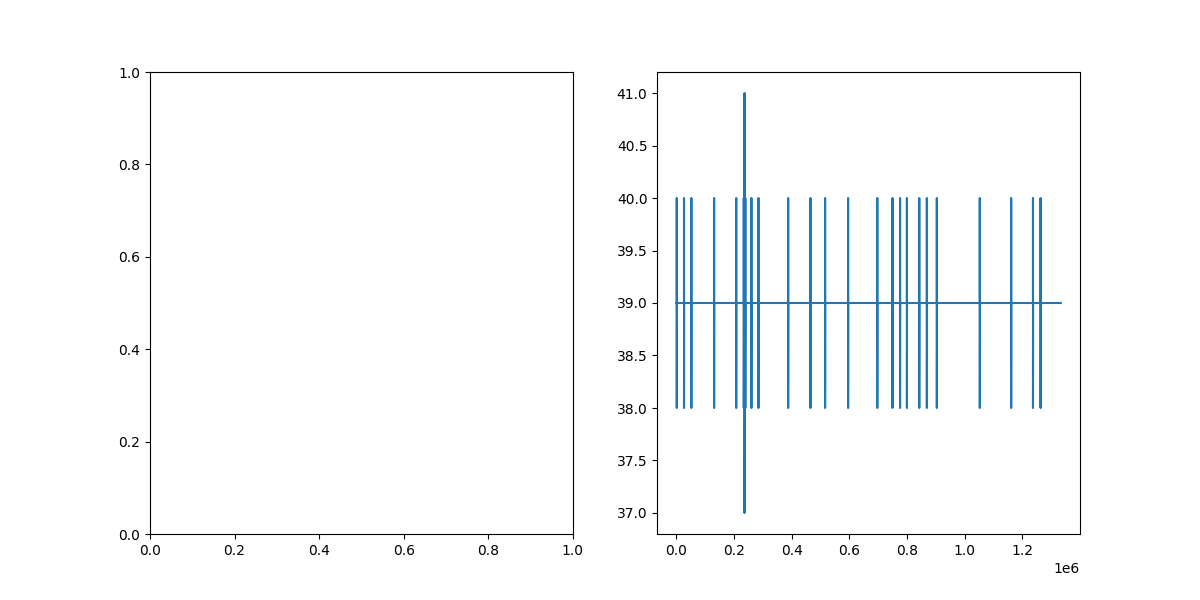

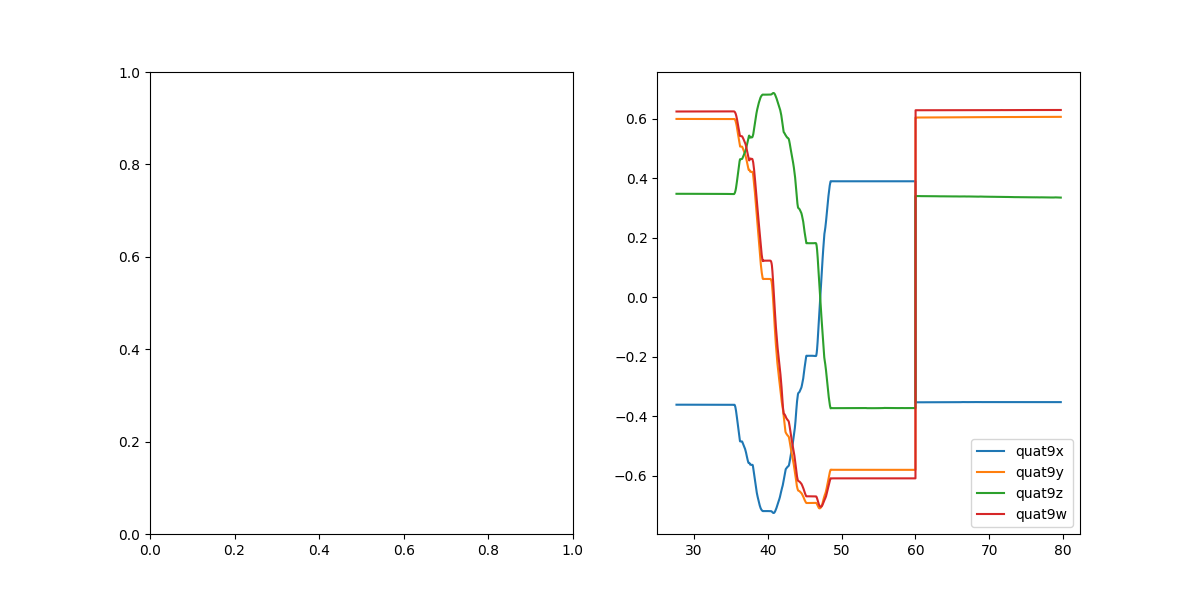

In [6]:
# widget
import matplotlib.pyplot as plt

%matplotlib widget

df["microstime"].diff().plot() # pour voir si il y'a des pertes de données
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# axs[0].plot(df["microstime"]/10**6, df["quat37x"], label="quat37x")
# axs[0].plot(df["microstime"]/10**6, df["quat37y"], label="quat37y")
# axs[0].plot(df["microstime"]/10**6, df["quat37z"], label="quat37z")
# axs[0].plot(df["microstime"]/10**6, df["quat37w"], label="quat37w")
# axs[0].legend()

axs[1].plot(df["microstime"]/10**6, df["quat9x"], label="quat9x")
axs[1].plot(df["microstime"]/10**6, df["quat9y"], label="quat9y")
axs[1].plot(df["microstime"]/10**6, df["quat9z"], label="quat9z")
axs[1].plot(df["microstime"]/10**6, df["quat9w"], label="quat9w")
axs[1].legend()
plt.show()

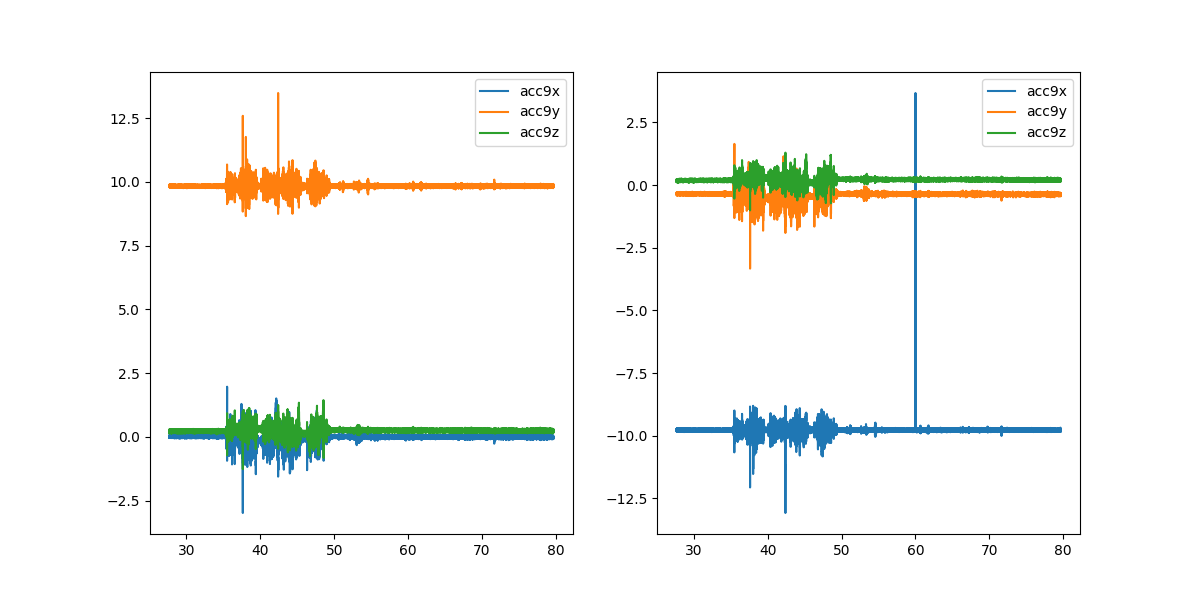

In [7]:
# widget
import matplotlib.pyplot as plt

%matplotlib widget

# plot acc
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(df["microstime"]/10**6, df["acc37x"], label="acc9x")
axs[0].plot(df["microstime"]/10**6, df["acc37y"], label="acc9y")
axs[0].plot(df["microstime"]/10**6, df["acc37z"], label="acc9z")
axs[0].legend()

axs[1].plot(df["microstime"]/10**6, df["acc9x"], label="acc9x")
axs[1].plot(df["microstime"]/10**6, df["acc9y"], label="acc9y")
axs[1].plot(df["microstime"]/10**6, df["acc9z"], label="acc9z")
axs[1].legend()

plt.show()


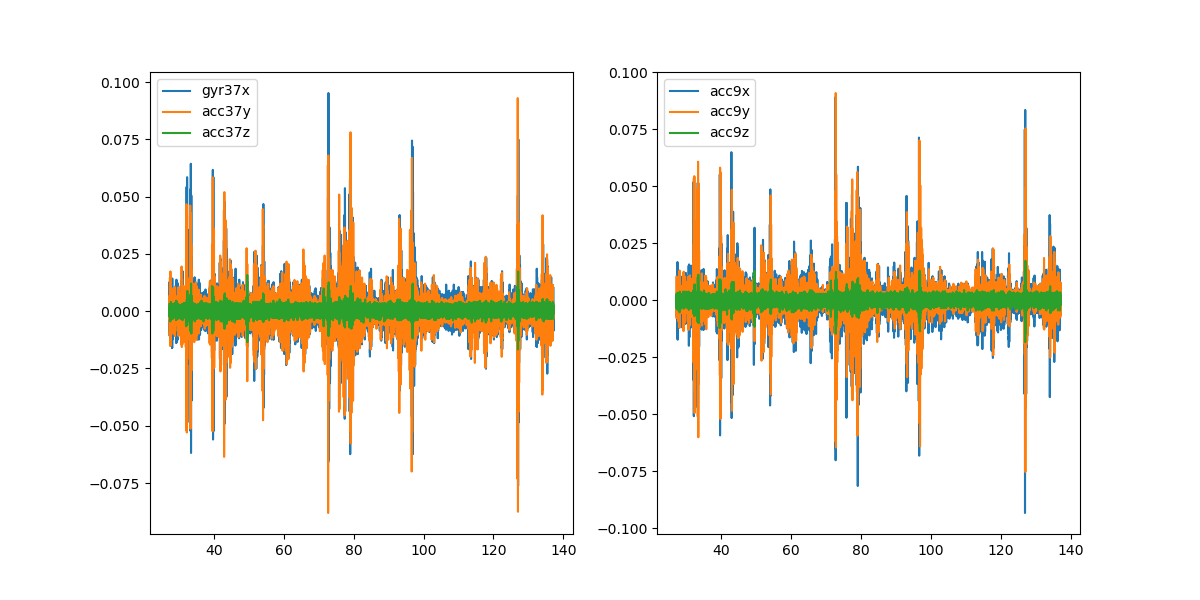

In [10]:
# plot acc
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(df["microstime"]/10**6, df["gyr37x"], label="gyr37x")
axs[0].plot(df["microstime"]/10**6, df["gyr37y"], label="acc37y")
axs[0].plot(df["microstime"]/10**6, df["gyr37z"], label="acc37z")
axs[0].legend()

axs[1].plot(df["microstime"]/10**6, df["gyr9x"], label="acc9x")
axs[1].plot(df["microstime"]/10**6, df["gyr9y"], label="acc9y")
axs[1].plot(df["microstime"]/10**6, df["gyr9z"], label="acc9z")
axs[1].legend()

plt.show()

In [ ]:
df

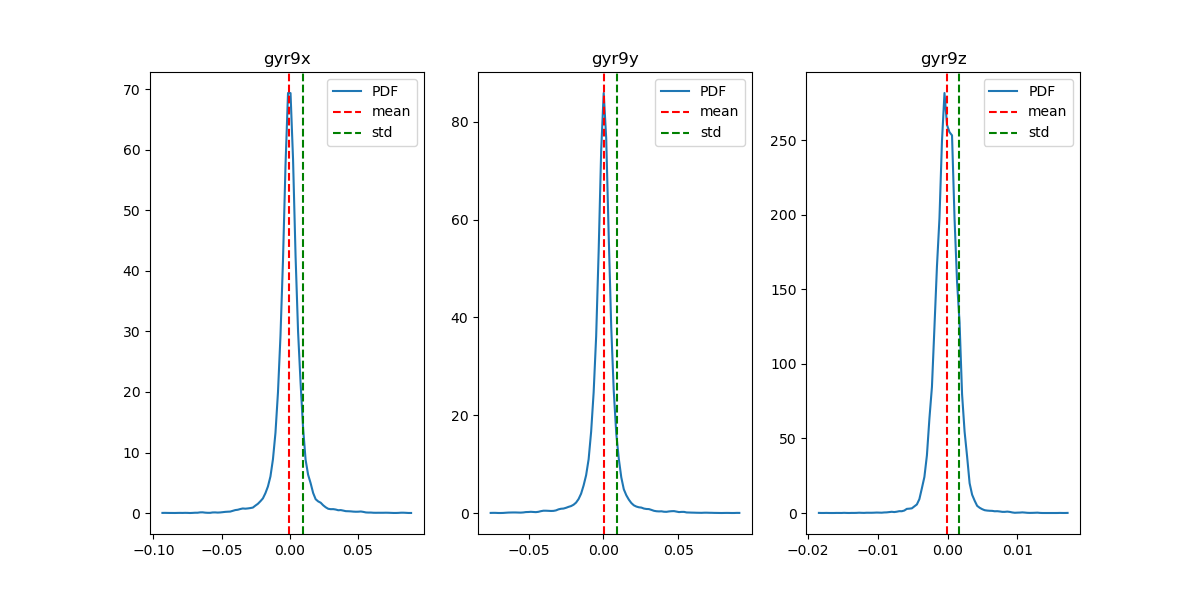

In [11]:
# plot the probability density function of gyr9x, gyr9y and gyr9z
# plot also the mean and the standard deviation

import numpy as np
import scipy.stats as stats

fig, axs = plt.subplots(1, 3, figsize=(12, 6))

for i, col in enumerate(["gyr9x", "gyr9y", "gyr9z"]):
    data = df[col].dropna()
    x = np.linspace(data.min(), data.max(), 100)
    kde = stats.gaussian_kde(data)
    axs[i].plot(x, kde(x), label="PDF")
    axs[i].axvline(data.mean(), color='r', linestyle='--', label="mean")
    axs[i].axvline(data.mean()+data.std(), color='g', linestyle='--', label="std")
    axs[i].legend()
    axs[i].set_title(col)

plt.show()


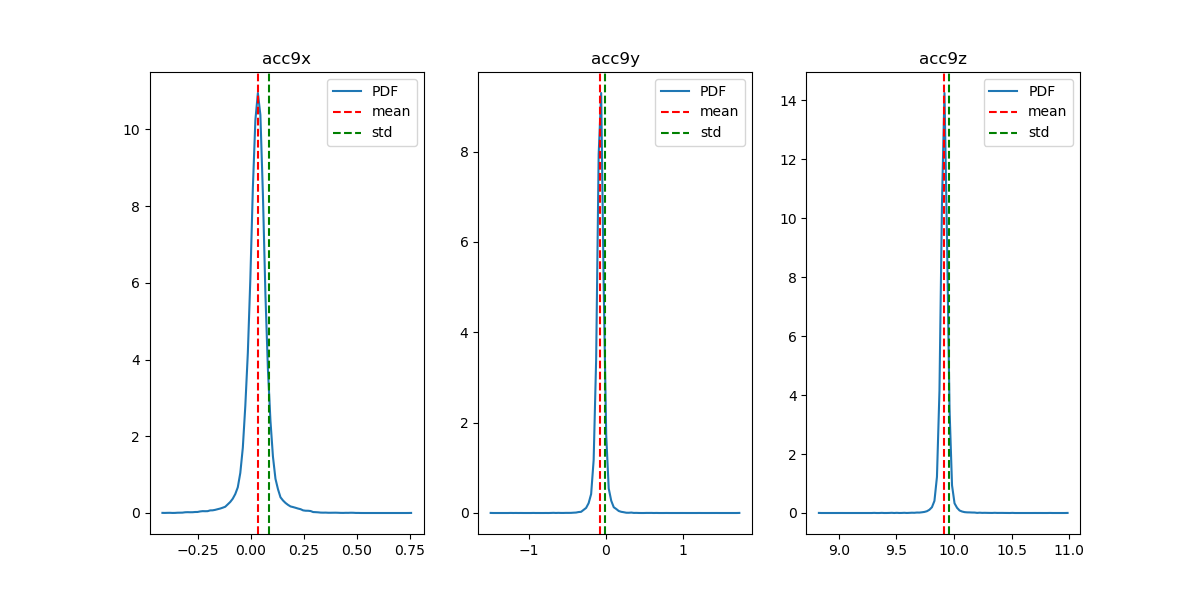

In [12]:
# plot the probability density function of gyr9x, gyr9y and gyr9z
# plot also the mean and the standard deviation

import numpy as np
import scipy.stats as stats

fig, axs = plt.subplots(1, 3, figsize=(12, 6))

for i, col in enumerate(["acc9x", "acc9y", "acc9z"]):
    data = df[col].dropna()
    x = np.linspace(data.min(), data.max(), 100)
    kde = stats.gaussian_kde(data)
    axs[i].plot(x, kde(x), label="PDF")
    axs[i].axvline(data.mean(), color='r', linestyle='--', label="mean")
    axs[i].axvline(data.mean()+data.std(), color='g', linestyle='--', label="std")
    axs[i].legend()
    axs[i].set_title(col)

plt.show()


In [15]:
import numpy as np
# theta = np.pi/2-np.arccos(1.0 - 2.0 * (x[:,6]*x[:,6] + x[:,7]*x[:,7]))
# alpha = np.arctan2(- 2 * (x[:,6]*x[:,8] + x[:,7]*x[:,9]),2 * (x[:,7]*x[:,8] - x[:,6]*x[:,9]))

theta = np.pi/2-np.arccos(1.0 - 2.0 * (df["quat9x"]*df["quat9x"] + df["quat9y"]*df["quat9y"]))
alpha = np.arctan2(- 2 * (df["quat9x"]*df["quat9z"] + df["quat9y"]*df["quat9w"]),2 * (df["quat9y"]*df["quat9z"] - df["quat9x"]*df["quat9w"]))

In [16]:
# last values microstime
last_microstime = df["microstime"].iloc[-1]
alpha.iloc[-1], theta.iloc[-1], last_microstime

(2.528926402503622, 1.5318125655935246, 137187399)

In [20]:
print((alpha.iloc[-1]-alpha.iloc[len(alpha)//2])*180/np.pi/((df["microstime"].iloc[-1]-df["microstime"].iloc[len(alpha)//2])/10**6/60))

0.7466110860083313


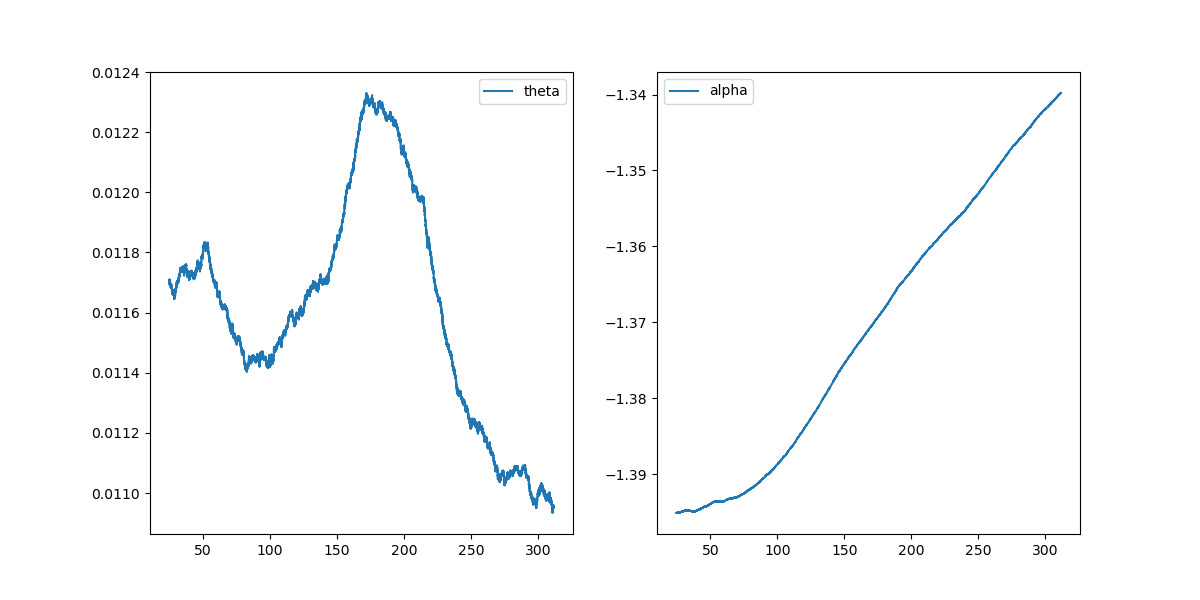

In [8]:
# plot theta and alpha
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(df["microstime"]/10**6, theta, label="theta")
axs[0].legend()

axs[1].plot(df["microstime"]/10**6, alpha, label="alpha")
axs[1].legend()

plt.show()